# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy.core as owm

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint
from api_keys import api_key

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


620

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#api_key = api_keys.api_key
# Import api_key form config file
#from config import api_key
# Create a setting object with API key and preferred units 
settings = {"units":"imperial", "appid": api_key}
weather_data = []
#with open
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
units = "imperial"
query_url = url + "appid=" + "&q" 
response = requests.get(query_url)
response_json = response.json
current_weather = owm.get_current("hilo",**settings)
print(f":the first reponse is:{current_weather}.")
#print(cities)

:the first reponse is:{'coord': {'lon': -155.08, 'lat': 19.71}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 78.04, 'pressure': 1015, 'humidity': 65, 'temp_min': 73.99, 'temp_max': 82.4}, 'visibility': 16093, 'wind': {'speed': 10.29, 'deg': 110}, 'clouds': {'all': 75}, 'dt': 1565578472, 'sys': {'type': 1, 'id': 7881, 'message': 0.0068, 'country': 'US', 'sunrise': 1565539172, 'sunset': 1565585499}, 'timezone': -36000, 'id': 5855927, 'name': 'Hilo', 'cod': 200}.


In [4]:
 url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
# set up list to hold reaponse info

name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0 
print(f"Start city count!")
print(f"~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
for city in cities:
    try: 
        url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key
        units = "imperial"
        query_url = url + "appid=" + "&q" 
        response = requests.get(query_url)
        response_json = response.json()
        response = requests.get(f"{url}&q={city}").json()
        name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
        count = count + 1
        print(f"\n\ncity number: {count} | City name: {city}")
        print(url)
        print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
        
    except KeyError:
        print("not found. moving along...")
  

Start city count!
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 1 | City name: scottsbluff
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 2 | City name: cape town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 3 | City name: rikitea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 4 | City name: vila velha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~



city number: 34 | City name: hilo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
not found. moving along...


city number: 35 | City name: guerrero negro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 36 | City name: port moresby
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 37 | City name: shenjiamen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



city number: 68 | City name: umea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 69 | City name: conceicao do araguaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
not found. moving along...


city number: 70 | City name: manokwari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 71 | City name: evensk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



city number: 103 | City name: sheridan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 104 | City name: bazarnyy syzgan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 105 | City name: dandong
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 106 | City name: esperance
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 107 | 



city number: 137 | City name: conde
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 138 | City name: ponta do sol
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 139 | City name: belyy yar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 140 | City name: zapolyarnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 141 | Ci



city number: 171 | City name: mitsamiouli
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 172 | City name: tilichiki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 173 | City name: haslett
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 174 | City name: wuzhou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 175 | City n



city number: 205 | City name: saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 206 | City name: temozon
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 207 | City name: ordzhonikidze
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 208 | City name: bonthe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 209 | City



city number: 239 | City name: tasiilaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
not found. moving along...


city number: 240 | City name: caravelas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 241 | City name: juneau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 242 | City name: austin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


ci



city number: 273 | City name: codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 274 | City name: shubarkuduk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 275 | City name: aswan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 276 | City name: jabinyanah
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 277 | Cit



city number: 307 | City name: noumea
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 308 | City name: raudeberg
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 309 | City name: simao
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 310 | City name: savalou
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 311 | City name: s



city number: 341 | City name: kampong cham
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 342 | City name: acapulco
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 343 | City name: sikeston
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 344 | City name: dodola
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 345 | City 



city number: 375 | City name: palauig
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
not found. moving along...


city number: 376 | City name: peruibe
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 377 | City name: taoudenni
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 378 | City name: lae
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city 



city number: 409 | City name: tabas
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 410 | City name: usulutan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 411 | City name: churapcha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 412 | City name: hermosillo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 413 | City na



city number: 443 | City name: rio grande
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 444 | City name: glamoc
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 445 | City name: yerbogachen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 446 | City name: ayagoz
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 447 | City n



city number: 477 | City name: rorvik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 478 | City name: santa rosa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 479 | City name: oussouye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 480 | City name: seminole
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 481 | City na



city number: 510 | City name: gushikawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 511 | City name: skerries
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 512 | City name: crotone
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
not found. moving along...


city number: 513 | City name: walvis bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~



city number: 543 | City name: lucapa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 544 | City name: plerin
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 545 | City name: berlevag
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 546 | City name: balkanabat
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=8dd9ac7f766c6541fa6b59a91716f2df
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~


city number: 547 | City name

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Create empty lists to append the API data into lists 
#weather_data.to_csv('Output_CSV/weather_data.csv')

city_data = pd.DataFrame({
    "City": name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max temp": max_temp,
    "Wind Speed": wind_speed 
})
# Print count list
city_data.count()

City          561
Cloudiness    561
Country       561
Date          561
Humidity      561
Lat           561
Lng           561
Max temp      561
Wind Speed    561
dtype: int64

In [6]:
# Export the city data into a .csv.
city_data.to_csv('city_weather.csv', header=True, index=True) 


In [7]:

# Display data frame 
city_data.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max temp,Wind Speed
0,Scottsbluff,1,US,1565578472,88,41.87,-103.67,71.60,6.89
1,Cape Town,75,ZA,1565578472,93,-33.93,18.42,55.00,3.36
2,Rikitea,100,PF,1565578473,84,-23.12,-134.97,72.87,17.20
3,Vila Velha,20,BR,1565578473,78,-3.71,-38.60,78.80,10.29
4,Tetoiu,0,RO,1565578473,77,44.75,23.92,70.00,5.82


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

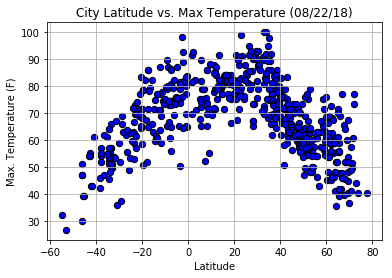

In [8]:
# create x and y axis 
x_lat = city_data['Lat']
y_temp = city_data['Max temp']
# plot the graph 
plt.scatter(x_lat, y_temp, marker="o", facecolors="blue", edgecolors="black", s=40)

#  graph labels
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Max_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

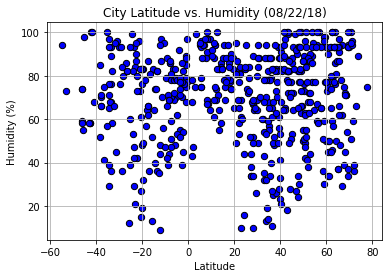

In [9]:
# create x and y axis 
x_lat = city_data['Lat']
y_hum = city_data['Humidity']
# plot the graph  
plt.scatter(x_lat, y_hum,marker="o", facecolors="blue", edgecolors="black", s=40)

# graph labels
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Humidity.png")

# Show plot
plt.show

#### Latitude vs. Cloudiness Plot

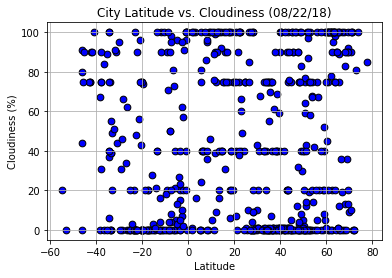

In [10]:
# create x and y axis 
x_lat = city_data['Lat']
y_cloud = city_data['Cloudiness']
# plot the graph  
plt.scatter(x_lat, y_cloud , marker="o", facecolors="blue", edgecolors="black", s=45)

#  graph labels
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

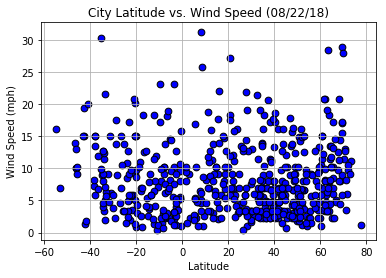

In [11]:
# create x and y axis 
x_lat = city_data['Lat']
y_wind = city_data['Wind Speed']
# plot the graph  
plt.scatter(x_lat, y_wind, marker="o", facecolors="blue", edgecolors="black", s=45)
# #  graph labels
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("Latitude_vs_Wind_Speed.png")

# Show plot
plt.show()